# Trabajo Práctico 2
Para la imagen suministrada “metal grid”. Implementar un algoritmo que:
1. Calcule los gradientes en la imagen (dirección y módulo)
2. Muestre imágenes de ángulo y módulo
3. Marque con color las direcciones de gradientes más altos

In [35]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.colors

In [36]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

## Cálculo de gradientes

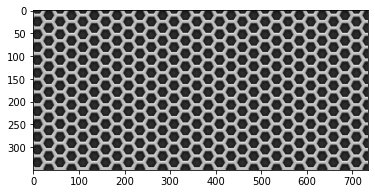

In [37]:
img_orig = cv.imread('./img/metalgrid.jpeg')
img_gray = cv.cvtColor(img_orig, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap ='gray')

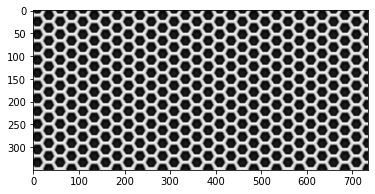

In [38]:
img_blur = cv.GaussianBlur(img_gray, ksize=(5, 5), sigmaX=0)
plt.imshow(img_blur, cmap ='gray')

### Cálculo de gradiente en X e Y. Cálculo de Direcciones.

In [39]:
def calculate_gradients(input_img: np.ndarray):
    # Aplicamos Sobelx en 'float64' y luego convertimos de nuevo a 8-bit para evitar overflow
    sobelx_64 = cv.Sobel(input_img,cv.CV_64F,1,0,ksize=3)
    absx_64 = np.absolute(sobelx_64)
    sobelx_8u1 = absx_64/absx_64.max()*255
    sobelx_8u = np.uint8(sobelx_8u1)

    # Aplicamos Sobelx en 'float64' y luego convertimos de nuevo a 8-bit para evitar overflow
    sobely_64 = cv.Sobel(input_img,cv.CV_32F,0,1,ksize=3)
    absy_64 = np.absolute(sobely_64)
    sobely_8u1 = absy_64/absy_64.max()*255
    sobely_8u = np.uint8(sobely_8u1)

    # De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
    mag = np.hypot(sobelx_8u, sobely_8u)
    mag = mag/mag.max()*255
    mag = np.uint8(mag)

    # Encontramos la Dirección y la pasamos a grados
    theta = np.arctan2(sobely_64, sobelx_64)
    angle = np.rad2deg(theta)

    return mag, angle


In [40]:
test_mag, test_angle = calculate_gradients(img_blur)
test_mag_no_filter, test_angle_no_filter = calculate_gradients(img_gray)

In [41]:
print(img_blur.shape)
print(test_mag.shape)
print(test_angle.shape)

(350, 735)
(350, 735)
(350, 735)


Text(0.5, 1.0, 'Angle')

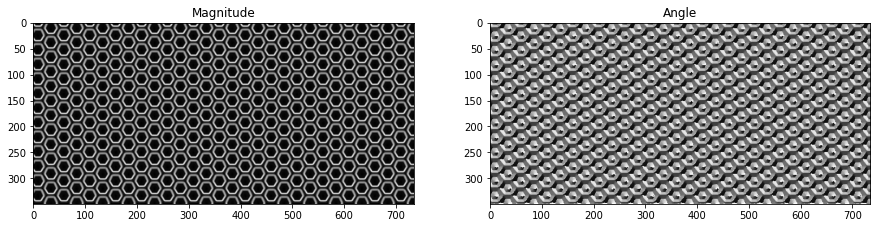

In [42]:
# Imágen de módulo y ángulo con filtros
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(test_mag, cmap='gray')
axs[0].set_title('Magnitude')
axs[1].imshow(test_angle, cmap='gray')
axs[1].set_title('Angle')

Text(0.5, 1.0, 'Angle')

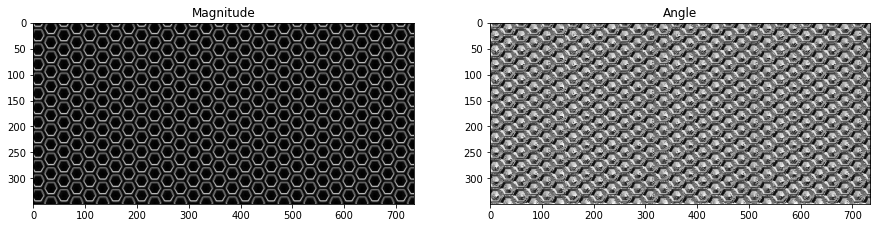

In [43]:
# Imágen de módulo y ángulo sin iltros
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(test_mag_no_filter, cmap='gray')
axs[0].set_title('Magnitude')
axs[1].imshow(test_angle_no_filter, cmap='gray')
axs[1].set_title('Angle')

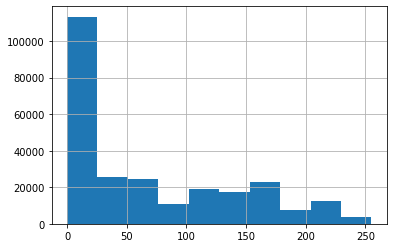

In [44]:
hist = plt.hist(test_mag.ravel(), density=False, label="Data")
plt.grid()

In [45]:
x_perc = np.percentile(test_mag, 95)

In [46]:
test_mag_90_mask = test_mag > x_perc
test_mag_90_mask.shape

(350, 735)

In [70]:
test_ang_mask = test_angle * test_mag_90_mask

Text(0.5, 1.0, 'Angle')

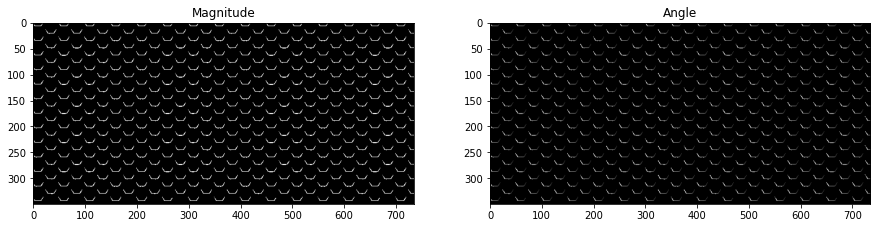

In [48]:
# Imágen de módulo y ángulo
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(test_mag_90_mask, cmap='gray')
axs[0].set_title('Magnitude')
axs[1].imshow(test_angle * test_mag_90_mask, cmap='gray')
axs[1].set_title('Angle')

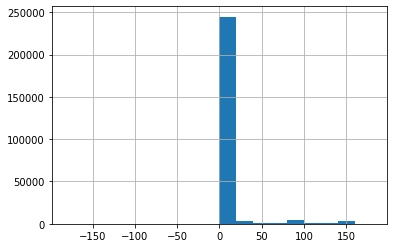

In [69]:
hist_mask = plt.hist(test_ang_mask.ravel(), density=False, bins=18, range=(-180, 180.0))
plt.grid()

In [67]:
hist_mask

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 3272.,  726.,  363., 4105.,  375.,  750., 2966.,    0.]),
 array([-180., -160., -140., -120., -100.,  -80.,  -60.,  -40.,  -20.,
           0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.]),
 <BarContainer object of 18 artists>)

La mayor parte de los valores se concentran entre:
1. 0-20º
2. 20º-40º
3. 80º-100º
4. 140º-160º 

(array([   0.,    0.,    5., 3267.,  363.,  363.,    0.,  363., 1677.,
        2428.,  215.,  160.,  375.,  375., 2950.,   16.,    0.,    0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180.]),
 <BarContainer object of 18 artists>)

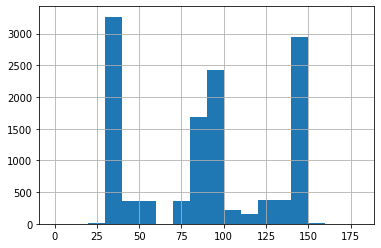

In [78]:
hist_mask = plt.hist(test_angle[test_mag > x_perc], density=False, bins=18, range=(0, 180))
plt.grid()
hist_mask

La mayor parte de los valores se concentran entre:
1. 30º-40º
2. 80º-100º
3. 140º-160º 

In [96]:
angle_mask_1 = (test_angle >= 30) & (test_angle <= 40)
angle_mask_2 = (test_angle >= 80) & (test_angle <= 100)
angle_mask_3 = (test_angle >= 140) & (test_angle <= 160)

In [101]:
img_orig[angle_mask_1] = (255,0,0)
img_orig[angle_mask_2] = (0,255,0)
img_orig[angle_mask_3] = (0,0,255)

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Angles in image")

plt.imshow(img_orig)